In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/morrisonosiezagha/Downloads/Online_Retail.csv", encoding="ISO-8859-1")

# Explore the dataset with first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


# DATA CLEANING

In [3]:
# check for duplicate entries
df.duplicated().sum()

5268

In [4]:
# clean duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
# check the number of rows and columns
df.shape

(536641, 8)

In [6]:
# check for nan entries
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [7]:
# clean nan entries under "Description" 
df = df.dropna(subset=["Description"]).reset_index(drop=True)
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

In [8]:
# validate change made after removing nan entries in "Description"
df.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133583
Country             0
dtype: int64

In [9]:
# check for Quantities less than and equal to zero
(df["Quantity"] <= 0).sum()

9725

In [10]:
# clean Quantities less than and equal to zero
df = df[df["Quantity"] > 0]

In [11]:
# validate changes made
(df["Quantity"] <= 0).sum()

0

In [12]:
# check for prices (UnitPrice) less than and equal to zero
(df["UnitPrice"] <= 0).sum()

584

In [13]:
# clean prices (UnitPrice) less than and equal to zero
df = df[df["UnitPrice"] > 0]

In [14]:
# validate changes made
(df["UnitPrice"] <= 0).sum()

0

In [15]:
# Handle missing CustomerID with "Guest" uder CustomerType (a new column) to retain CustomerID as numerical
df["CustomerType"] = df["CustomerID"].apply(lambda x: "Guest" if pd.isna(x) else "Client")

# check dtype for all variables after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 535186
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     524878 non-null  object 
 1   StockCode     524878 non-null  object 
 2   Description   524878 non-null  object 
 3   Quantity      524878 non-null  int64  
 4   InvoiceDate   524878 non-null  object 
 5   UnitPrice     524878 non-null  float64
 6   CustomerID    392692 non-null  float64
 7   Country       524878 non-null  object 
 8   CustomerType  524878 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 40.0+ MB


In [16]:
# Save the cleaned dataset
df.to_csv("clean_online_retail.csv", index=False)

# FEATURE ENGINEERING

In [18]:
# Calculate TotalPrice and assign output to TotalPrice
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

# Validate added Feature (TotalPrice) and check dtype for all variables after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524878 entries, 0 to 535186
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   InvoiceNo     524878 non-null  object 
 1   StockCode     524878 non-null  object 
 2   Description   524878 non-null  object 
 3   Quantity      524878 non-null  int64  
 4   InvoiceDate   524878 non-null  object 
 5   UnitPrice     524878 non-null  float64
 6   CustomerID    392692 non-null  float64
 7   Country       524878 non-null  object 
 8   CustomerType  524878 non-null  object 
 9   TotalPrice    524878 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 44.0+ MB


In [19]:
# convert "InvoiceDate" to datetime for efficient processing
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], errors='coerce')

# extract relevant features (Year, Month, Hour, and DayOfWeek) from "InvoiceDate"
df["Year"] = df["InvoiceDate"].dt.year # to get the year
df["Month"] = df["InvoiceDate"].dt.month # to get the month of the year 
df["Hour"] = df["InvoiceDate"].dt.hour
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name() # to get the Day of week

df.set_index("InvoiceDate", inplace=True) # to filter time efficiently and set wrong dates to nan

# Handle Peak and Off-Peak hours with new Binary feature, "PeakHourCheck"
df["PeakHourCheck"] = np.where((df["Hour"] >= 9.0) & (df["Hour"] <= 18.0), 1, 0) # 1=Peak Hours, 0=Off-Peak hours

# validate changes and check new variable dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 524878 entries, 2010-01-12 08:26:00 to 2011-09-12 12:50:00
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      524878 non-null  object 
 1   StockCode      524878 non-null  object 
 2   Description    524878 non-null  object 
 3   Quantity       524878 non-null  int64  
 4   UnitPrice      524878 non-null  float64
 5   CustomerID     392692 non-null  float64
 6   Country        524878 non-null  object 
 7   CustomerType   524878 non-null  object 
 8   TotalPrice     524878 non-null  float64
 9   Year           225423 non-null  float64
 10  Month          225423 non-null  float64
 11  Hour           225423 non-null  float64
 12  DayOfWeek      225423 non-null  object 
 13  PeakHourCheck  524878 non-null  int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 60.1+ MB


In [20]:
# check nan entries from InvoiceDate datetime conversion
df.isna().sum()

InvoiceNo             0
StockCode             0
Description           0
Quantity              0
UnitPrice             0
CustomerID       132186
Country               0
CustomerType          0
TotalPrice            0
Year             299455
Month            299455
Hour             299455
DayOfWeek        299455
PeakHourCheck         0
dtype: int64

In [21]:
# Handle wrong date formats (now nan entries) by dropping them
df.dropna(subset=["Year"], inplace=True)
df.dropna(subset=["Month"], inplace=True)
df.dropna(subset=["Hour"], inplace=True)
df.dropna(subset=["DayOfWeek"], inplace=True)

#validating changes made
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
UnitPrice            0
CustomerID       59060
Country              0
CustomerType         0
TotalPrice           0
Year                 0
Month                0
Hour                 0
DayOfWeek            0
PeakHourCheck        0
dtype: int64

In [22]:
# validating all variable dtype before saving
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225423 entries, 2010-01-12 08:26:00 to 2011-09-12 12:50:00
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      225423 non-null  object 
 1   StockCode      225423 non-null  object 
 2   Description    225423 non-null  object 
 3   Quantity       225423 non-null  int64  
 4   UnitPrice      225423 non-null  float64
 5   CustomerID     166363 non-null  float64
 6   Country        225423 non-null  object 
 7   CustomerType   225423 non-null  object 
 8   TotalPrice     225423 non-null  float64
 9   Year           225423 non-null  float64
 10  Month          225423 non-null  float64
 11  Hour           225423 non-null  float64
 12  DayOfWeek      225423 non-null  object 
 13  PeakHourCheck  225423 non-null  int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 25.8+ MB


In [23]:
# save feature-engineered dataset
df.to_csv("feature_engineered_online_retail.csv", index=False)

# EXPLORATORY DATA ANALYSIS (EDA)

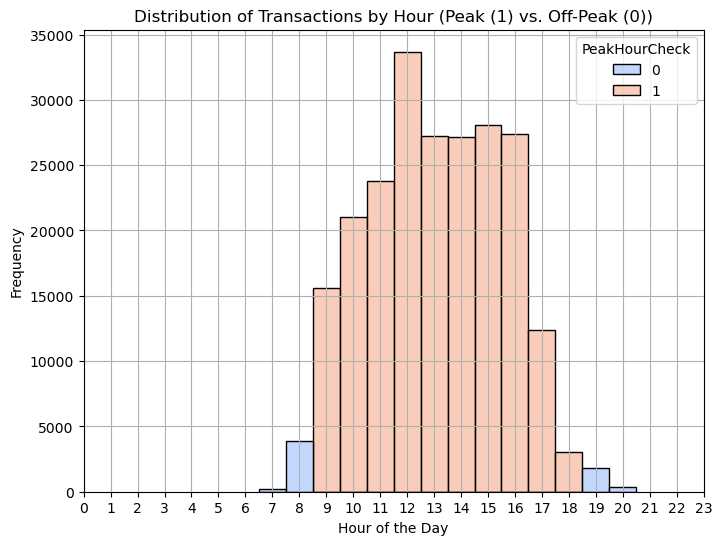

In [25]:
# Exploring busy (peak) and less busy (off-peak) hour transactions amongst customers
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="Hour", hue="PeakHourCheck", bins=24, discrete=True, kde=False, palette="coolwarm", alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Frequency")
plt.title("Distribution of Transactions by Hour (Peak (1) vs. Off-Peak (0))")
# plt.legend(title="Peak Hour Check")
plt.xticks(range(0, 24))  # Ensure all hours are shown
plt.grid(True)
plt.show()

8:00AM seems fine to be included as Peak hour; 12NOON is the busiest hour acttracting more sales

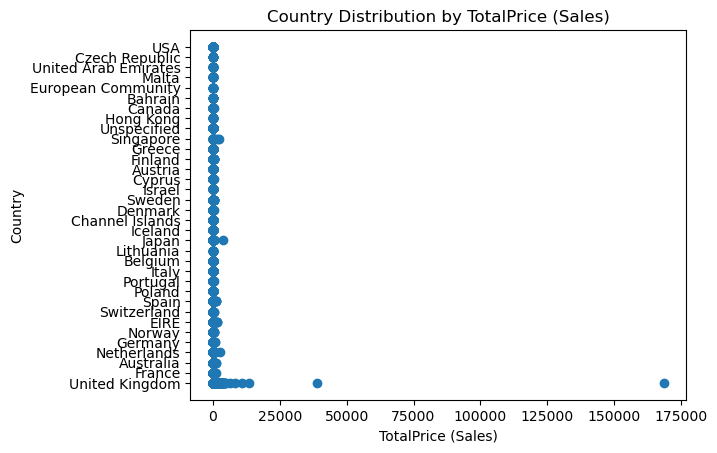

In [27]:
# explore countries with the most sales
plt.scatter(df["TotalPrice"], df["Country"])
plt.title("Country Distribution by TotalPrice (Sales)")
plt.xlabel("TotalPrice (Sales)")
plt.ylabel("Country")
plt.show()

Extremely high sales observed above 38,000 and 160,000 respectively in the UK

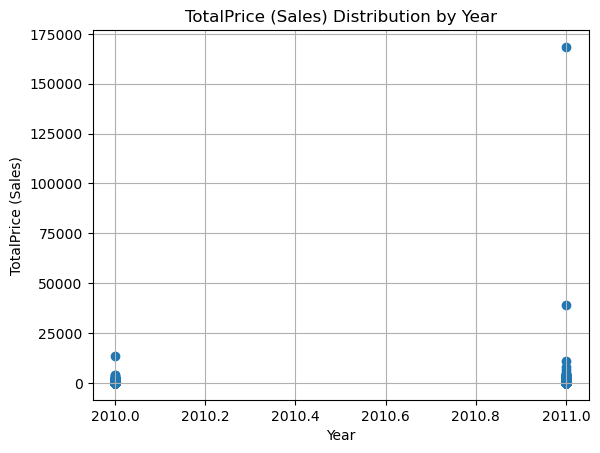

In [29]:
# exploring the year with the highest sales (TotalPrice)
plt.scatter(df["Year"], df["TotalPrice"])
plt.title("TotalPrice (Sales) Distribution by Year")
plt.xlabel("Year")
plt.ylabel("TotalPrice (Sales)")
plt.grid(True)
plt.show()

The higher sales (>25,000) happened in 2011 while 2010 has <25,000

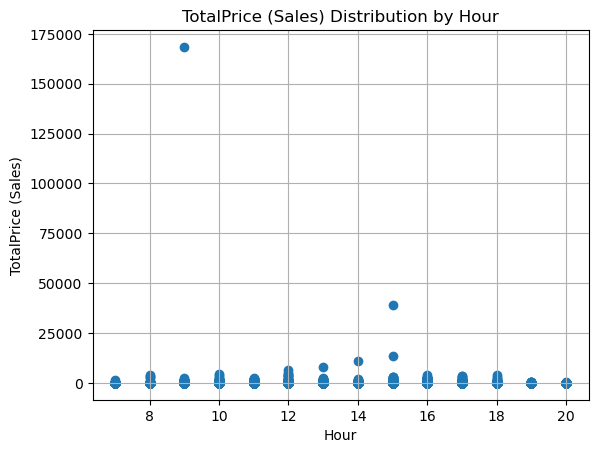

In [31]:
# exploring the hour with the highest sales (TotalPrice)
plt.scatter(df["Hour"], df["TotalPrice"])
plt.title("TotalPrice (Sales) Distribution by Hour")
plt.xlabel("Hour")
plt.ylabel("TotalPrice (Sales)")
plt.grid(True)
plt.show()

The extremely high sales occured at 9:00AM (9:00HR) and 3:00PM (15:00HR)

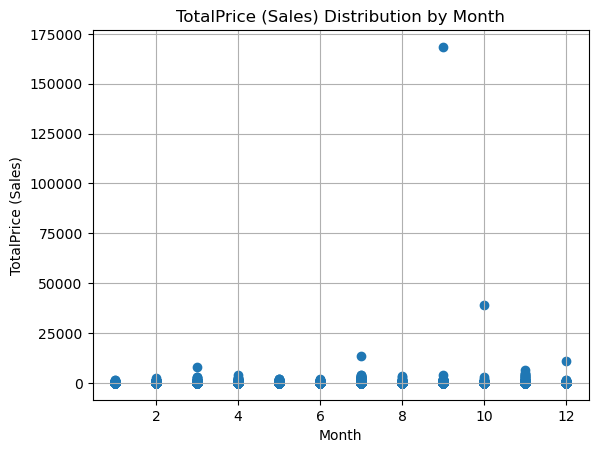

In [33]:
# exploring the Month with the highest sales (TotalPrice)
plt.scatter(df["Month"], df["TotalPrice"])
plt.title("TotalPrice (Sales) Distribution by Month")
plt.xlabel("Month")
plt.ylabel("TotalPrice (Sales)")
plt.grid(True)
plt.show()

The extremely high sales occured in the months of September and October

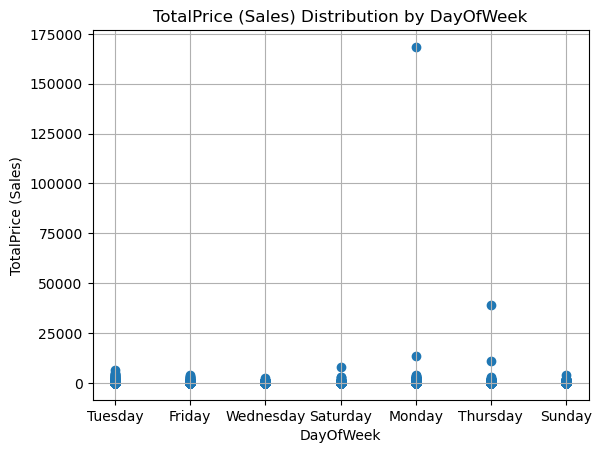

In [35]:
# exploring the DayOfWeek with the highest sales (TotalPrice)
plt.scatter(df["DayOfWeek"], df["TotalPrice"])
plt.title("TotalPrice (Sales) Distribution by DayOfWeek")
plt.xlabel("DayOfWeek")
plt.ylabel("TotalPrice (Sales)")
plt.grid(True)
plt.show()

Mondays and Thurdays appears to be the days with the extreme high sales

In [37]:
# Handling Customer Spending
# Group by CustomerID and get the maximum TotalPrice for each customer
max_total_price_per_customer = df.groupby("CustomerID")["TotalPrice"].max()

# Sort the result to get the top 10 customers with the highest maximum TotalPrice
top_10_customers = max_total_price_per_customer.sort_values(ascending=False).head(10)

# Display the result
print(f"Top 10 spending {top_10_customers}")


Top 10 spending CustomerID
16446.0    168469.60
15098.0     38970.00
16029.0      8142.75
15749.0      6539.40
12931.0      4176.00
17450.0      4121.64
15195.0      3861.00
18102.0      3828.00
12755.0      3794.40
16210.0      3254.40
Name: TotalPrice, dtype: float64


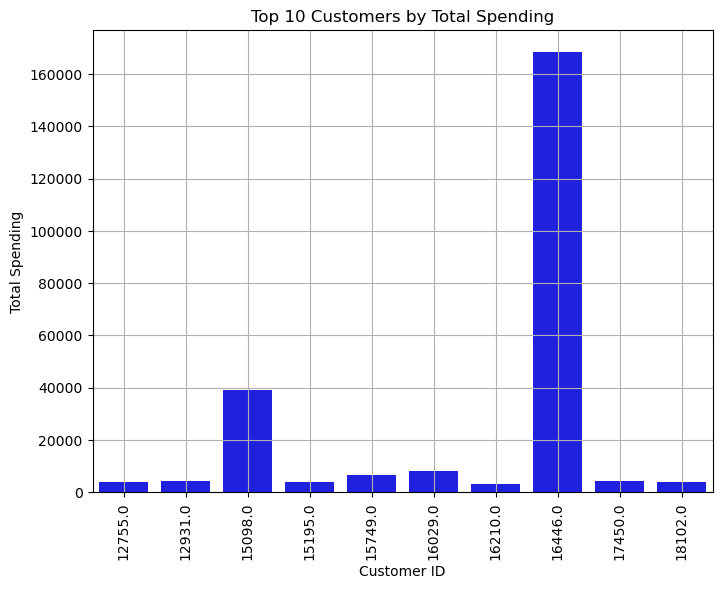

In [38]:
# Visualizing customers by their total spending
plt.figure(figsize=(8,6))
sns.barplot(x=top_10_customers.index, y=top_10_customers.values, color="blue")
plt.xlabel("Customer ID")
plt.ylabel("Total Spending")
plt.title("Top 10 Customers by Total Spending")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

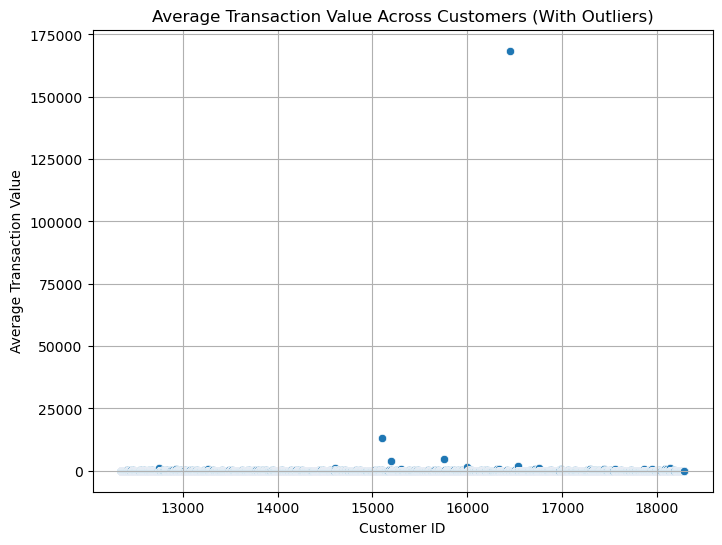

In [39]:
# Handling Customer Spending
# Calculate the total spending per customer
total_spending_per_customer = df.groupby("CustomerID")["TotalPrice"].sum()

# Calculate the number of transactions per customer
transactions_per_customer = df.groupby("CustomerID")["TotalPrice"].count()

# Calculate the average transaction value per customer
average_transaction_value = total_spending_per_customer / transactions_per_customer

# visualize the average transaction value
plt.figure(figsize=(8,6))
sns.scatterplot(x=average_transaction_value.index, y=average_transaction_value.values)
plt.xlabel("Customer ID")
plt.ylabel("Average Transaction Value")
plt.title("Average Transaction Value Across Customers (With Outliers)")
plt.grid(True)
plt.show()


Extremely high spendings are noticed and will be classified as Outliers to get the average transaction value (without outliers)

In [41]:
# Compute the average transaction value 
average_transaction_value = df["TotalPrice"].mean()

# Print the result (correctly formatted)
print(f"Average transaction value (without removing outliers): {average_transaction_value:.2f}")

Average transaction value (without removing outliers): 20.69


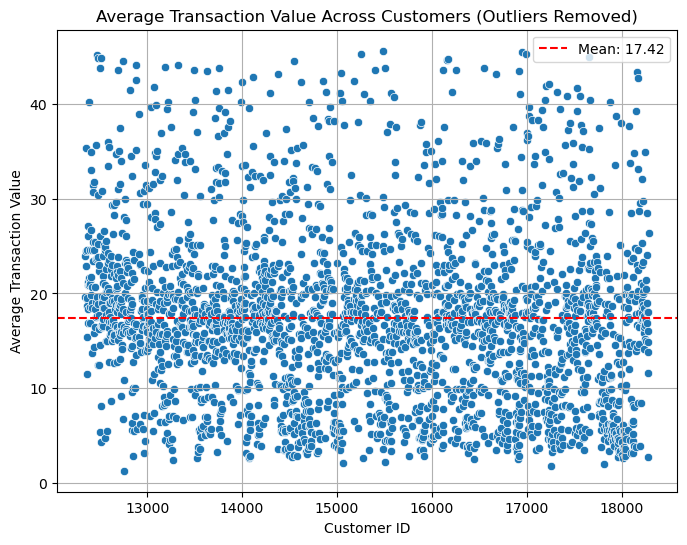

In [42]:
# Handling Outliers (Extremely high values)
# Calculate the average transaction value per customer
average_transaction_value = total_spending_per_customer / transactions_per_customer

# Remove outliers using IQR
Q1 = average_transaction_value.quantile(0.25)
Q3 = average_transaction_value.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_average_transaction_value = average_transaction_value[
    (average_transaction_value >= lower_bound) & (average_transaction_value <= upper_bound)
]

# Visualize the average transaction value
plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_average_transaction_value.index, y=filtered_average_transaction_value.values)
plt.axhline(y=filtered_average_transaction_value.mean(), color='r', linestyle='--', label=f'Mean: {filtered_average_transaction_value.mean():.2f}')
plt.xlabel("Customer ID")
plt.ylabel("Average Transaction Value")
plt.title("Average Transaction Value Across Customers (Outliers Removed)")
plt.legend()
plt.grid(True)
plt.show()


# INSIGHTS AND RECOMMENDATION

- 8:00AM (8:00HR) seems fine to be included as Peak hour; 12NOON is the busiest hour acttracting more sales
- Extremely high sales observed above 38,000 and 160,000 respectively in the UK
- The higher sales (>25,000) happened in 2011 while 2010 has <25,000
- The extremely high sales occured at 9:00AM (9:00HR) and 3:00PM (15:00HR)
- The extremely high sales occured in the months of September and October
- Mondays and Thurdays appears to be the days with the extreme high sales
- Customers with IDs 16446.0 and 15098.0 have the highest sales with 168469.60 and 38970.00 respectively
- Extremely high spendings were noticed and classified as Outliers to compute the Average Transaction Value
- The Average Transaction Value (without removing outliers)is 20.69
- The Average Transaction value (after removing outliers)is 17.42
- 8:00AM should be included as busy hour for customer conversion
- Target customers in the UK (Singapore, Japan, and Neitherlands as well) as they appear to be high spenders. Open more branches if possible. 
- September and October are very lucrative months for business. Proper planning to capture sales are required.
- Retain high spending customers. Especially the top 10 through discounted sales or gifts.
